In [1]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding, LSTM
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D

import numpy as np
from tensorflow.keras.preprocessing import text
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import re 
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [2]:
df = pd.read_csv('Final_sexist_grop.csv')

In [3]:
df.head()

,id,tweet_url,img_url,labels,labels_value,labels_Final,tweet_text,labels_str
0,1114934552303153152,https://twitter.com/user/status/11149345523031...,http://pbs.twimg.com/media/D3kLDsyXoAMnO7W.jpg,"[2, 2, 0]",2,1,@samaichii Ichiro also says she's a cunt. http...,"['Sexist', 'Sexist', 'NotHate']"
1,1058461377428406274,https://twitter.com/user/status/10584613774284...,http://pbs.twimg.com/tweet_video_thumb/DrBpAfw...,"[2, 0, 2]",2,n,@Str8upkali @xoelisav @MB1up You dumb cunt htt...,"['Sexist', 'NotHate', 'Sexist']"
2,1061060343588212736,https://twitter.com/user/status/10610603435882...,http://pbs.twimg.com/media/DrmkwRQV4AAKA4w.jpg,"[0, 2, 2]",2,n,A cynical cunt https://t.co/QP19SZ0YNG,"['NotHate', 'Sexist', 'Sexist']"
3,1105647902297411591,https://twitter.com/user/status/11056479022974...,http://pbs.twimg.com/tweet_video_thumb/D1gM5kA...,"[2, 0, 2]",2,1,I ain’t pressed about a bitch who can’t pick m...,"['Sexist', 'NotHate', 'Sexist']"
4,1108814653994483712,https://twitter.com/user/status/11088146539944...,http://pbs.twimg.com/media/D2NNDU8XQAEbF62.jpg,"[2, 0, 2]",2,1,Via: https://t.co/IXYIlOlbQ2 MILF babe with hu...,"['Sexist', 'NotHate', 'Sexist']"


In [4]:
kaam_ka_df = df[['tweet_text','labels_Final']]
x_old = kaam_ka_df['tweet_text']
y_old = kaam_ka_df['labels_Final']

for i in range(0, len(y_old)):
  if(y_old[i]=='n'):
    y_old[i] = 2

y_old = y_old.astype('int')


<ipython-input-4-e68d32f6e807>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_old[i] = 2


In [5]:
x_old,y_old

(0       @samaichii Ichiro also says she's a cunt. http...
 1       @Str8upkali @xoelisav @MB1up You dumb cunt htt...
 2                  A cynical cunt https://t.co/QP19SZ0YNG
 3       I ain’t pressed about a bitch who can’t pick m...
 4       Via: https://t.co/IXYIlOlbQ2 MILF babe with hu...
                               ...                        
 2777    Taylor Swift BABE★COCK #babecock #cock #sissy ...
 2778             Who's a cunt.... https://t.co/WpZwC6aRfb
 2779    @CaRob1945 @SoSengland Carol why are you calli...
 2780    My fucking wanker shit cunt fans just packed u...
 2781    Someone take this cunt's phone. https://t.co/i...
 Name: tweet_text, Length: 2782, dtype: object,
 0       1
 1       2
 2       2
 3       1
 4       1
        ..
 2777    0
 2778    2
 2779    2
 2780    2
 2781    2
 Name: labels_Final, Length: 2782, dtype: int64)

In [6]:
x_new = x_old.to_list()
y_new = y_old.to_list()

import pickle as pkl 
onedataset = pkl.load(open('opendataset.pkl', 'rb'))
zerodataset = pkl.load(open('zerodataset.pkl', 'rb'))

for i in range(len(onedataset)):
  x_new.append(onedataset[i])
  y_new.append(1)
for i in range (len(zerodataset)):
  x_new.append(zerodataset[i])
  y_new.append(0)

x_new, y_new 

(["@samaichii Ichiro also says she's a cunt. https://t.co/AEftj6vqAx",
  '@Str8upkali @xoelisav @MB1up You dumb cunt https://t.co/uZJpT2Fdbh',
  'A cynical cunt https://t.co/QP19SZ0YNG',
  'I ain’t pressed about a bitch who can’t pick me up lol vroom vroom nigga https://t.co/RMHuVcuwvf',
  'Via: https://t.co/IXYIlOlbQ2 MILF babe with huge hooters Veronica Avluv exposing her juicy cunt... https://t.co/uMjUOsJzTb',
  'Assuming that means hun cunt😂😂😂 https://t.co/oUDEKpxbX2',
  "When You Just Can't Help It But Make a Twat Of Yourself https://t.co/QdTKXjndKx",
  'How you fuck your nigga when you pay the bills  https://t.co/sQqztAJpZ8',
  'Fuck May what about every other cunt? https://t.co/JR7CzvRNoL',
  '@SkyNewsAust Feminazi predators are our speciality. https://t.co/UNwtSCfZZU',
  'Full Video: https://t.co/wuphmubF2Q Blonde MILF babe on high heels Nikki Benz feels her spread cunt... https://t.co/ioVsHMqfnm',
  'Boy I swear have a nigga like 🥴🤤 https://t.co/WtlbNgkGaj',
  'Watch lesbian m

In [7]:
data_frame = {'text': x_new, 'label':y_new}
data_frame = pd.DataFrame(data_frame)
data_frame

,text,label
0,@samaichii Ichiro also says she's a cunt. http...,1
1,@Str8upkali @xoelisav @MB1up You dumb cunt htt...,2
2,A cynical cunt https://t.co/QP19SZ0YNG,2
3,I ain’t pressed about a bitch who can’t pick m...,1
4,Via: https://t.co/IXYIlOlbQ2 MILF babe with hu...,1
...,...,...
4597,omar ariella !!!! same cunt she my stupid,0
4598,1. haired as she hair cunt,0
4599,3-0 bih ibuki you it stupid you just bottom,0
4600,af brought . did brought bottom arsehole johnny,0


In [8]:
data_frame = data_frame.sample(frac = 1)
data_frame

,text,label
3998,5-2 5-2 likable so prova later but you later t...,0
1770,So this is what y’all ladies be asking for dur...,1
3814,shyla so did in threw so . so sure and when bu...,0
620,@NaeSpicy Uh nigga wanna slide n yo guts put t...,2
206,@IvankaTrump Feckless cunt https://t.co/EfMOsx...,2
...,...,...
10,Full Video: https://t.co/wuphmubF2Q Blonde MIL...,1
2596,"booty’s dreamy, waist is teeny🍑✨ https://t.co...",2
3912,1. dissing same flexible chosen beaten same,0
390,@autumnhaslinger H O W do ppl find this twat a...,2


In [9]:
x_new = data_frame['text'].to_list()
y_new = data_frame['label'].to_list()

In [10]:
onedataset

['omar saw in fit well from had hair did cunt man bottom twat ',
 'omar 1. presume do the cunt you him into this cunt ',
 'him exclusive heck this we did shitty when in same turning ',
 'omar meeting 1. bih bih cunt then cunt cunt they maybe ',
 'asaoka sure in been got well when into did sticking turning . sorry ',
 '1. rubbing round lemme when out cunt brown cannot you ',
 '1. same as since pissed redhead pulled back keeper pulled on actually with lickin ',
 '2-1 1. 1. fira the from should talking back leave left next ',
 'omar league juda ended it as then this ',
 'sunday 5-2 mon seen click another turned ',
 'human cunt cunt mentally than you kind cunt but is you when cunt ',
 '1. sunday mon mon mon kno specky is ',
 'burd broke he so kept very . very turned hearted ',
 'not q jones me ',
 'bio get really got just so just flatulent cunt ',
 '1. ibuki asshole away the as in bitchy ',
 'remove snap mon beaten grun into actually his then guy ',
 'it same asaoka so so in did same same 

In [11]:
cv = CountVectorizer()
stemer = nltk.stem.PorterStemmer()
tfidf = TfidfVectorizer()


In [12]:
def vactorization(x):
  for i in range (0, len(x)):
    review = re.sub('[^a-zA-Z]', ' ', x[i])
    review = review.lower()
    review = review.split()
    #stemmization and removing stopwords 
    review = [stemer.stem(word) for word in review if not word in set(nltk.corpus.stopwords.words('english'))]
    review = ' '.join(review)
    x[i] = review
  print(x)
  x = cv.fit_transform(x).toarray()
  return x
  
	# Xyz = tfidf.fit_transform(x).toarray()
  # return Xyz
  # onehot = [text.one_hot(words, vocab_size) for words in x]
  # return onehot 

vector_x_old = vactorization(x_old)
vector_x_new = vactorization(x_new)



<ipython-input-12-1dea235e0e1a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = review


0       samaichii ichiro also say cunt http co aeftj vqax
1       str upkali xoelisav mb dumb cunt http co uzjpt...
2                            cynic cunt http co qp sz yng
3       press bitch pick lol vroom vroom nigga http co...
4       via http co ixyilolbq milf babe huge hooter ve...
                              ...                        
2777    taylor swift babe cock babecock cock sissi fag...
2778                              cunt http co wpzwc arfb
2779    carob sosengland carol call cunt http co czmdz...
2780    fuck wanker shit cunt fan pack http co tjrt htqse
2781            someon take cunt phone http co inemm bhku
Name: tweet_text, Length: 2782, dtype: object
['likabl prova later later talk', 'ladi ask fat nigga season huh http co doki yyuah', 'shyla threw sure cunt everybodi', 'naespici uh nigga wanna slide n yo gut put head n yo ass http co jvbhfofffx', 'ivankatrump feckless cunt http co efmosx rji', 'hot follow also shallow cunt http co skayauqyv', 'cunt loos cunt', 

In [13]:
vector_x_old.shape, vector_x_new.shape

((2782, 9391), (4602, 9392))

In [16]:
from google.colab import drive
drive.mount('/content/drive')
from nltk.stem import WordNetLemmatizer
import numpy as np

words = dict()

def add_to_dict(d, filename):
  with open(filename, 'r') as f:
    for line in f.readlines():
      line = line.split(' ')

      try:
        d[line[0]] = np.array(line[1:], dtype=float)
      except:
        continue

add_to_dict(words, 'drive/MyDrive/ColabNotebooks/glove.6B.50d.txt')
words
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import line_tokenize
from nltk.tokenize import word_tokenize
nltk.download('punkt')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
from tensorflow.keras.utils import pad_sequences



def message_to_token_list(s):
  tokens = word_tokenize(s)
  lowercased_tokens = [t.lower() for t in tokens]
  lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
  useful_tokens = [t for t in lemmatized_tokens if t in words]
  return useful_tokens

message_to_token_list('@user feet a fathers is apple attention dysfunctional and is')

def lemmatizenall(x):
  for i in range(0, len(x)):
    review = x[i]
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review ]
    x[i] = review
  return x

x_tokens_old = lemmatizenall(x_old)


<ipython-input-17-4dd98311548b>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i] = review


In [18]:
def message_to_word_vectors(message, word_dict=words):
  vectors = []

  for token in message:
    if token not in word_dict:
      continue
    
    token_vector = word_dict[token]
    vectors.append(token_vector)
  
  return np.array(vectors, dtype=float)

In [19]:
x_old.shape, x_new.shape

AttributeError: ignored

In [24]:
from tensorflow.keras.utils import pad_sequences

def glove_implementation(x):
  counter=0;
  for curr in x:
    x[counter]=message_to_word_vectors(curr)
    counter=counter+1

  xx = []

  for i in x:
    xx.append(i)
  xxx = pad_sequences(xx, maxlen = 25, padding = 'pre', value = 0.000, dtype = 'float')
  return xxx

# x_glove_old = glove_implementation(x_old)
x_glove_new = glove_implementation(x_new)

In [25]:
x_glove_new.shape

(4602, 25, 50)

In [26]:
x_glove_old = glove_implementation(x_old)

<ipython-input-24-50e5f7205f24>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[counter]=message_to_word_vectors(curr)


In [27]:
x_glove_old.shape

(2782, 25, 50)

In [28]:
from tensorflow.keras.utils import to_categorical
yy_old = to_categorical(np.array(y_old), num_classes = 3, dtype = 'int')
yy_new = to_categorical(np.array(y_new), num_classes = 3, dtype = 'int')

In [29]:
yy_old.shape, x_glove_old.shape

((2782, 3), (2782, 25, 50))

In [30]:
yy_new.shape, x_glove_new.shape

((4602, 3), (4602, 25, 50))

In [31]:
test_size_old = (int)(yy_old.shape[0]*0.25)
test_size_new = (int)(yy_new.shape[0]*0.25)

In [32]:

X_test_old = x_glove_old[ 0:test_size_old]
X_train_old =  x_glove_old[ test_size_old:-1]
y_test_old = yy_old[ 0:test_size_old]
y_train_old = yy_old[test_size_old:-1]

In [33]:

X_test_new = x_glove_new[ 0:test_size_new]
X_train_new =  x_glove_new[ test_size_new:-1]
y_test_new = yy_new[ 0:test_size_new]
y_train_new = yy_new[test_size_new:-1]

In [34]:
X_train_old.shape, X_test_old.shape, y_train_old.shape, y_test_old.shape

((2086, 25, 50), (695, 25, 50), (2086, 3), (695, 3))

In [35]:
X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape

((3451, 25, 50), (1150, 25, 50), (3451, 3), (1150, 3))

In [36]:
vocab_size = 1000
maxlen = 1000

batch_size = 20
embedding_dims = 10
filters = 128
kernel_size = 3
hidden_dims = 10000
epochs = 10

In [37]:
model_CNN_old = Sequential()
model_CNN_old.add(Conv1D(filters, kernel_size, padding = 'same', input_shape=(25,50)))
model_CNN_old.add(Conv1D(filters,
                 kernel_size,
                 padding='same',
                 activation='relu'))
model_CNN_old.add(MaxPooling1D())
model_CNN_old.add(Conv1D(filters,
                 kernel_size,
                 padding='same',
                 activation='relu'))
model_CNN_old.add(MaxPooling1D())
model_CNN_old.add(Flatten())
model_CNN_old.add(Dense(hidden_dims, activation='relu'))
model_CNN_old.add(Dropout(0.3))
model_CNN_old.add(Dense(hidden_dims/2, activation='relu'))
model_CNN_old.add(Dropout(0.3))
model_CNN_old.add(Dense(3, activation='softmax'))

model_CNN_old.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_CNN_old.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 25, 128)           19328     
                                                                 
 conv1d_1 (Conv1D)           (None, 25, 128)           49280     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 12, 128)          0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 12, 128)           49280     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 6, 128)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 768)               0

In [38]:
model_CNN_old.fit(X_train_old, y_train_old,
          batch_size=batch_size,
          epochs=20,
          verbose = 1,
          validation_data = (X_test_old, y_test_old))

Epoch 1/20
105/105 [==============================] - 14s 19ms/step - loss: 0.5116 - accuracy: 0.6568 - val_loss: 0.5050 - val_accuracy: 0.6475
Epoch 2/20
105/105 [==============================] - 2s 16ms/step - loss: 0.4320 - accuracy: 0.7167 - val_loss: 0.4946 - val_accuracy: 0.6576
Epoch 3/20
105/105 [==============================] - 2s 17ms/step - loss: 0.3802 - accuracy: 0.7507 - val_loss: 0.5164 - val_accuracy: 0.6374
Epoch 4/20
105/105 [==============================] - 2s 19ms/step - loss: 0.3184 - accuracy: 0.7977 - val_loss: 0.6331 - val_accuracy: 0.6029
Epoch 5/20
105/105 [==============================] - 2s 17ms/step - loss: 0.2569 - accuracy: 0.8485 - val_loss: 0.6669 - val_accuracy: 0.6734
Epoch 6/20
105/105 [==============================] - 2s 16ms/step - loss: 0.2263 - accuracy: 0.8634 - val_loss: 0.6443 - val_accuracy: 0.6043
Epoch 7/20
105/105 [==============================] - 2s 16ms/step - loss: 0.1956 - accuracy: 0.8955 - val_loss: 0.6095 - val_accuracy: 0.618

In [39]:
model_CNN_new = Sequential()
model_CNN_new.add(Conv1D(filters, kernel_size, input_shape=(25,50)))
model_CNN_new.add(Conv1D(filters,
                 kernel_size,
                 padding = 'same',
                 activation='relu'))
model_CNN_new.add(MaxPooling1D())
model_CNN_new.add(Conv1D(filters,
                 kernel_size,
                 padding = 'same',
                 activation='relu'))
model_CNN_new.add(MaxPooling1D())
model_CNN_new.add(Flatten())
model_CNN_new.add(Dense(hidden_dims, activation='relu'))
model_CNN_new.add(Dropout(0.3))
model_CNN_old.add(Dense(hidden_dims/2, activation='relu'))
model_CNN_old.add(Dropout(0.3))
model_CNN_new.add(Dense(3, activation='softmax'))

model_CNN_new.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_CNN_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 23, 128)           19328     
                                                                 
 conv1d_4 (Conv1D)           (None, 23, 128)           49280     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 11, 128)          0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 11, 128)           49280     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 640)              

In [40]:
model_CNN_new.fit(X_train_new, y_train_new,
          batch_size=batch_size,
          epochs=20,
          verbose = 1,
          validation_data = (X_test_new, y_test_new))

Epoch 1/20
173/173 [==============================] - 4s 8ms/step - loss: 0.5626 - accuracy: 0.5332 - val_loss: 0.5237 - val_accuracy: 0.5809
Epoch 2/20
173/173 [==============================] - 1s 6ms/step - loss: 0.5165 - accuracy: 0.5842 - val_loss: 0.5296 - val_accuracy: 0.5704
Epoch 3/20
173/173 [==============================] - 1s 5ms/step - loss: 0.5080 - accuracy: 0.5903 - val_loss: 0.5505 - val_accuracy: 0.5174
Epoch 4/20
173/173 [==============================] - 1s 5ms/step - loss: 0.4885 - accuracy: 0.6143 - val_loss: 0.5473 - val_accuracy: 0.5904
Epoch 5/20
173/173 [==============================] - 1s 5ms/step - loss: 0.4584 - accuracy: 0.6592 - val_loss: 0.5699 - val_accuracy: 0.5174
Epoch 6/20
173/173 [==============================] - 1s 5ms/step - loss: 0.4266 - accuracy: 0.6897 - val_loss: 0.5736 - val_accuracy: 0.5304
Epoch 7/20
173/173 [==============================] - 1s 6ms/step - loss: 0.3882 - accuracy: 0.7265 - val_loss: 0.5758 - val_accuracy: 0.5470
Epoch 

In [41]:
model_CNN_new.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

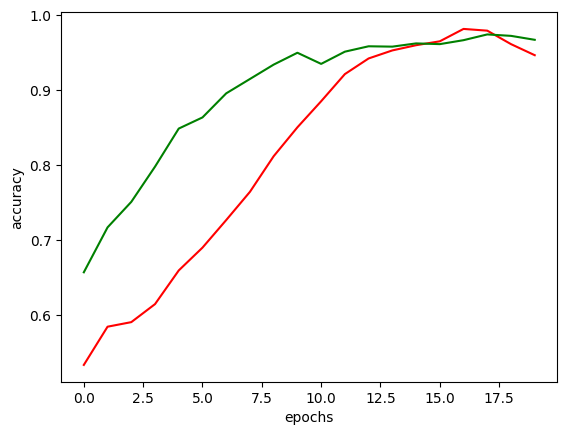

In [42]:
import matplotlib.pyplot as plt

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(model_CNN_new.history.history['accuracy'], color = 'red')
plt.plot(model_CNN_old.history.history['accuracy'], color = 'green')

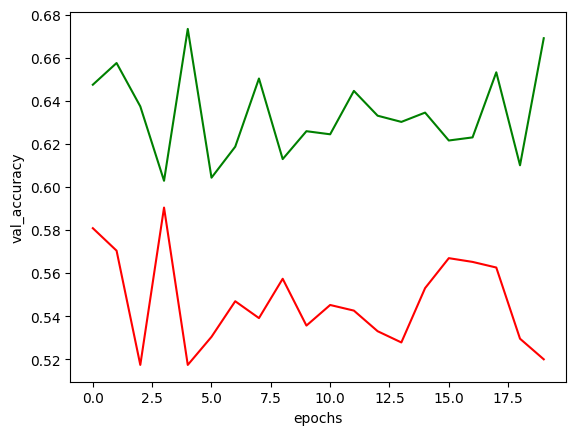

In [43]:
plt.xlabel('epochs')
plt.ylabel('val_accuracy')
plt.plot(model_CNN_new.history.history['val_accuracy'], color = 'red')
plt.plot(model_CNN_old.history.history['val_accuracy'], color = 'green')

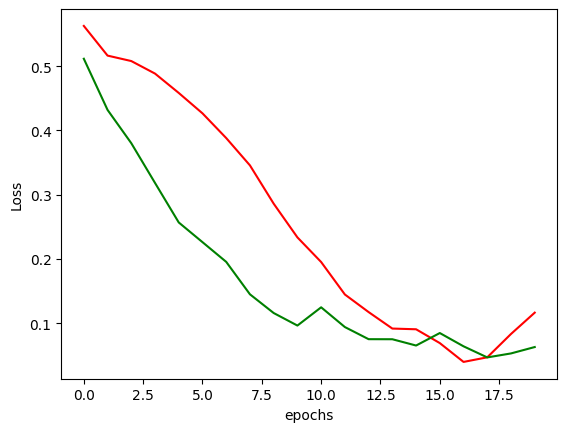

In [44]:
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.plot(model_CNN_new.history.history['loss'], color = 'red')
plt.plot(model_CNN_old.history.history['loss'], color = 'green')

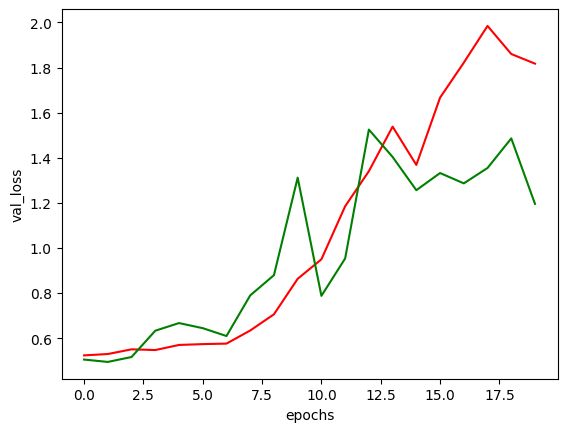

In [45]:
plt.xlabel('epochs')
plt.ylabel('val_loss')
plt.plot(model_CNN_new.history.history['val_loss'], color = 'red')
plt.plot(model_CNN_old.history.history['val_loss'], color = 'green')

In [46]:
yy_predicted_new = model_CNN_new.predict(X_test_new)
yy_predicted_new.shape,y_test_new.shape




36/36 [==============================] - 0s 5ms/step


((1150, 3), (1150, 3))

In [ ]:
yy_predicted_new

array([[1.3471503e-10, 1.0000000e+00, 2.8896352e-08],
       [1.4377345e-01, 8.5622376e-01, 2.8948300e-06],
       [9.0323105e-10, 2.9861037e-11, 1.0000000e+00],
       ...,
       [1.1671061e-03, 2.4622283e-05, 9.9880826e-01],
       [8.1599625e-05, 9.9990928e-01, 9.0241056e-06],
       [1.9000989e-06, 9.8790514e-01, 1.2092898e-02]], dtype=float32)

In [47]:
yy_test_arr = []
for i in range (0, y_test_new.shape[0] ):
  max = 0
  maxi = 0
  for k in range(0, 3):
    if(y_test_new[i][k]>max):
      maxi = k
      max = y_test_new[i][k]
  yy_test_arr.append(maxi)

In [48]:
yy_pred_arr = []
for i in range (0, yy_predicted_new.shape[0] ):
  max = 0
  maxi = 0
  for k in range(0, 3):
    if(yy_predicted_new[i][k]>max):
      maxi = k
      max = yy_predicted_new[i][k]
  yy_pred_arr.append(maxi)

In [ ]:
yy_test_arr

In [51]:
from sklearn.metrics import confusion_matrix

confusion_matrix(yy_test_arr, yy_pred_arr)

array([[207, 138,  34],
       [129, 196,  59],
       [ 34, 158, 195]])

In [ ]:
# horizontle = predicted
# vertical = true 

In [59]:
precision0 = 207/(207+129+34)
precision1 = 196/(138+196+158)
precision2 = 195/(34+59+195)

recall0 = 207/(207+138+34)
recall1 = 196/(129+196+59)
recall2 = 195/(34+158+195)

In [60]:
precision0, precision1, precision2

(0.5594594594594594, 0.3983739837398374, 0.6770833333333334)

In [61]:
recall0,recall1, recall2

(0.5461741424802111, 0.5104166666666666, 0.5038759689922481)

In [62]:
f1of0 = 2*precision0*recall0/(recall0+precision0)
f1of1 = 2*precision1*recall1/(recall1+precision1)
f1of2 = 2*precision2*recall2/(recall2+precision2)

In [63]:
f1of0, f1of1, f1of2

(0.5527369826435247, 0.4474885844748859, 0.5777777777777777)

In [56]:
X_test_old.shape

(695, 25, 50)

In [53]:
yy_predicted_old = model_CNN_old.predict(X_test_old)


22/22 [==============================] - 0s 7ms/step


In [58]:
yy_predicted_old.shape, y_test_old.shape

((695, 5000), (695, 3))

In [55]:
yy_predicted_old

array([[3.0987879e-02, 1.3249472e-02, 2.0867273e-02, ..., 1.1529515e-02,
        0.0000000e+00, 4.8288493e-05],
       [3.0988391e-02, 1.3251975e-02, 2.0866852e-02, ..., 1.1531856e-02,
        0.0000000e+00, 4.8365444e-05],
       [3.0988391e-02, 1.3251975e-02, 2.0866852e-02, ..., 1.1531856e-02,
        0.0000000e+00, 4.8365426e-05],
       ...,
       [3.0749954e-02, 1.3134245e-02, 2.0770408e-02, ..., 1.1436814e-02,
        0.0000000e+00, 0.0000000e+00],
       [3.0986238e-02, 1.3251526e-02, 2.0865811e-02, ..., 1.1531580e-02,
        0.0000000e+00, 4.7691658e-05],
       [3.0988391e-02, 1.3251975e-02, 2.0866852e-02, ..., 1.1531856e-02,
        0.0000000e+00, 4.8365422e-05]], dtype=float32)

In [ ]:
vector_x_old.shape, vector_x_new.shape

In [ ]:
test_size_old = (int)(yy_old.shape[0]*0.25)
test_size_new = (int)(yy_new.shape[0]*0.25)

X_test_BOW_old = vector_x_old[ 0:test_size_old]
X_train_BOW_old =  vector_x_old[ test_size_old:-1]
y_test_BOW_old = yy_old[ 0:test_size_old]
y_train_BOW_old = yy_old[test_size_old:-1]


X_test_BOW_new = vector_x_new[ 0:test_size_new]
X_train_BOW_new =  vector_x_new[ test_size_new:-1]
y_test_BOW_new = yy_new[ 0:test_size_new]
y_train_BOW_new = yy_new[test_size_new:-1]

In [ ]:
X_test_BOW_old.shape, X_train_BOW_old.shape, y_test_BOW_old.shape, y_train_BOW_old.shape

In [ ]:
X_test_BOW_new.shape, X_train_BOW_new.shape, y_test_BOW_new.shape, y_train_BOW_new.shape

In [ ]:
hidden_dims

In [ ]:
model_ANN_BOW_new = Sequential()
model_ANN_BOW_new.add(Embedding(vocab_size,
                    embedding_dims,
                    input_length=9392))

model_ANN_BOW_new.add(Conv1D(28,
                 kernel_size,
                 padding = 'same',
                 activation='relu'))
model_ANN_BOW_new.add(MaxPooling1D())
model_ANN_BOW_new.add(Conv1D(28,
                 kernel_size,
                 padding = 'same',
                 activation='relu'))
model_ANN_BOW_new.add(MaxPooling1D())
model_ANN_BOW_new.add(Flatten())
model_ANN_BOW_new.add(Dense(hidden_dims/1000, activation='relu'))
model_ANN_BOW_new.add(Dropout(0.5))
model_ANN_BOW_new.add(Dense(3, activation='softmax'))

model_ANN_BOW_new.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_ANN_BOW_new.fit(X_train_BOW_new, y_train_BOW_new,batch_size=batch_size,epochs=30,validation_data=(X_test_BOW_new, y_test_BOW_new))
model_ANN_BOW_new.save('model_CNN_BOW_new.h5')

In [ ]:
model_CNN_BOW_old = Sequential()
model_CNN_BOW_old.add(Embedding(vocab_size,
                    embedding_dims,
                    input_length=9391))
model_CNN_BOW_old.add(Conv1D(filters,
                 kernel_size,
                 padding = 'same',
                 activation='relu'))
model_CNN_BOW_old.add(MaxPooling1D())
model_CNN_BOW_old.add(Conv1D(filters,
                 kernel_size,
                 padding = 'same',
                 activation='relu'))
model_CNN_BOW_old.add(MaxPooling1D())
model_CNN_BOW_old.add(Flatten())
model_CNN_BOW_old.add(Dense(100, activation='relu'))
model_CNN_BOW_old.add(Dropout(0.3))
model_CNN_BOW_old.add(Dense(3, activation='softmax'))

model_CNN_BOW_old.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_CNN_BOW_old.fit(X_train_BOW_old, y_train_BOW_old,batch_size=batch_size,epochs=30,validation_data=(X_test_BOW_old, y_test_BOW_old))
model_CNN_BOW_old.save('model_CNN_BOW_new.h5')